(60000, 3136) (60000, 10)
Epoch 0, Loss: 1.9568
Epoch 10, Loss: 0.8761
Epoch 20, Loss: 0.6746
Epoch 30, Loss: 0.5874
Epoch 40, Loss: 0.5371
Epoch 50, Loss: 0.5036
Epoch 60, Loss: 0.4794
Epoch 70, Loss: 0.4609
Epoch 80, Loss: 0.4462
Epoch 90, Loss: 0.4341
Epoch 100, Loss: 0.4240
Epoch 110, Loss: 0.4154
Epoch 120, Loss: 0.4079
Epoch 130, Loss: 0.4013
Epoch 140, Loss: 0.3955
Epoch 150, Loss: 0.3903
Epoch 160, Loss: 0.3855
Epoch 170, Loss: 0.3813
Epoch 180, Loss: 0.3774
Epoch 190, Loss: 0.3738
Epoch 200, Loss: 0.3704
Epoch 210, Loss: 0.3674
Epoch 220, Loss: 0.3645
Epoch 230, Loss: 0.3619
Epoch 240, Loss: 0.3594
Epoch 250, Loss: 0.3570
Epoch 260, Loss: 0.3548
Epoch 270, Loss: 0.3527
Epoch 280, Loss: 0.3508
Epoch 290, Loss: 0.3489
Epoch 300, Loss: 0.3471
Epoch 310, Loss: 0.3455
Epoch 320, Loss: 0.3439
Epoch 330, Loss: 0.3423
Epoch 340, Loss: 0.3409
Epoch 350, Loss: 0.3395
Epoch 360, Loss: 0.3381
Epoch 370, Loss: 0.3368
Epoch 380, Loss: 0.3356
Epoch 390, Loss: 0.3344
Epoch 400, Loss: 0.3333
E

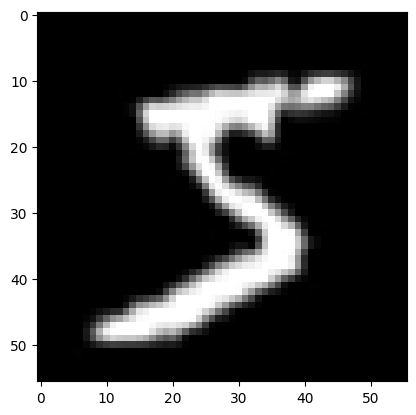

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tăng kích thước ảnh lên gấp đôi
x_train = np.array([cv2.resize(img, (56, 56), interpolation=cv2.INTER_CUBIC) for img in x_train])
x_test = np.array([cv2.resize(img, (56, 56), interpolation=cv2.INTER_CUBIC) for img in x_test])

# Hiển thị ảnh đầu tiên trong tập huấn luyện
plt.imshow(x_train[0], cmap='gray')


# Chuyển đổi thành vector 1D
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Chuẩn hóa dữ liệu
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode nhãn
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)

# Định nghĩa các hàm
def predict(x, w):
    h = np.dot(x, w)
    softmax = np.exp(h - np.max(h, axis=1, keepdims=True))  # Tránh overflow
    y_pred = softmax / np.sum(softmax, axis=1, keepdims=True)
    return y_pred

def loss(x, w, y):
    y_pred = predict(x, w)
    return -np.sum(np.log(y_pred + 1e-10) * y) / y.shape[0]  # Tránh log(0)

def gradient(x, w, y):
    y_pred = predict(x, w)
    delta = y_pred - y
    return np.dot(x.T, delta) / x.shape[0]

def train(x, w, y, lr, epoch):
    for i in range(epoch):
        w -= lr * gradient(x, w, y)
        if i % 10 == 0:  # Hiển thị loss mỗi 10 epoch
            print(f"Epoch {i}, Loss: {loss(x, w, y):.4f}")
    return w

# Khởi tạo trọng số
w = np.zeros((x_train.shape[1], y_train.shape[1]))

# Huấn luyện mô hình
w = train(x_train, w, y_train, 0.09, 10000)

# Dự đoán
y_pred = predict(x_test, w)

# Chọn nhãn dự đoán
predicted_classes = np.argmax(y_pred, axis=1)
# Chọn nhãn thực tế
y_test_labels = np.argmax(y_test, axis=1)

# Tính độ chính xác
accuracy = accuracy_score(y_test_labels, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Tính độ hồi tưởng (Recall) và độ chính xác (Precision) cho từng lớp
precision = precision_score(y_test_labels, predicted_classes, average='weighted')
recall = recall_score(y_test_labels, predicted_classes, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

import pickle

# Lưu trọng số mô hình vào tệp 'softmax_model.pkl'
with open('softmax_weight.pkl', 'wb') as f:
    pickle.dump(w, f)

